# Visualizing Data

In this lesson, we will learn about how we can use Python to visualize quantitative data through histograms, box plots, scatter plots, pie charts, and bar plots. 

# Table of contents
[0. Variable Types](#0.-Variable-Types)

[1. Histograms](#1.-Histograms)

[2. Scatter Plots](#2.-Scatter-Plots)

[3. Bar Plots](#3.-Bar-Plots)

[4. Box Plots](#4.-Box-Plots)

Functions in this notebook which you may want to reuse:

`remove_nan(data)`

`select_above_zero(data)`

`plot_two_histograms(data1, data2, label1, label2, xlabel, ylabel, title)`

`plot_one_histogram(data, label, xlabel, ylabel, title)`

`scatterplot(xdata, ydata, xlabel, ylabel, title)`


# 0. Variable Types

The type of plot to use will depend on whether the data we want to plot consists of continiuous, discrete, or categorical variables. 

**Continuous variables** are numeric variables that can take on any value within its permissible range. Examples of continuous variables are length measurements (e.g. height, width) and time measurements. 

**Discrete variables** are numeric variables that can take on a set of finite values. Examples are coin values (1,5,10,25,50,100 cents), and the number of pokemon in your Pokemon Blue pokedex (integers between 0-151). 

**Categorical variables**, like discrete variables, can only take on a finite number of values, but the values might not have a logical order and they don't have to be numerical. Examples of categorical variables include gender, food preference, and payment method.

We will see that some plots are better than others at displaying information about continuous, discrete, or categorical variables and that sometimes we can use the same plot to visualize more than one type of variable simultaneously. 

In [75]:
# First, we import the libraries we will use in this notebook and load the Fragile Families data. 
# The first line sets maplotlib plots to show inside the notebook.
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

# import warnings
# warnings.filterwarnings("ignore")

# Directory with data
data_dir = "../../ai4all_data"

# Load data
data_frame = pd.read_csv(data_dir+'/background.csv', index_col=0, low_memory=False) # for now we load all the data

# 1. Histograms

In this section we will learn how to plot histograms. Histograms are diagrams consisting of rectangles (bins) whose height  is proportional to the frequency of a variable  (i.e., number of times the variable appears in the data) and whose  width is equal to the class interval (i.e., the range of values that fall within the bin).

Here, we will plot two histograms. The first histogram will be for the age of the mother when the child was born and the second histogram will be for the age of the father when the child was born.

Try and use the Fragile Families feature lookup website to find the name of the features that contains the mother's and father's age when the child was born. You snould find that the feature names are cm1age and cf1age.

#### Question: Are these continuous or discrete variables?

#### Answer:



In [40]:
# We will use these functions below.
'''
This function removes rows containing NaNs from a 
DataFrame. Works for both 1D and 2D DataFrames.
'''
def remove_nan(data):
    if len(data.shape)>1:
        return data[(~np.isnan(data)).all(1)]
    else:
        return data[~np.isnan(data)]

In [91]:
'''
This function removes rows with values below 0 from a 
DataFrame. Works for both 1D and 2D DataFrames.
'''
def select_above_zero(data):
    if len(data.shape)>1:
        return data[(data>0).all(1)]
    else:
        return data[data>0]

In [104]:
'''
Plot a histogram based on a 1D DataFrame
'''
def plot_one_histogram(data, label="", xlabel="", ylabel="", title=""):
    max_val = int(max(data))
    min_val = int(min(data))
    bins = np.linspace(min_val, max_val, min(max_val-min_val,100))
    fig = plt.figure(figsize=(7,7))
    plt.hist(data, bins, alpha=0.5, label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc="upper right")
    plt.show()

In [105]:
'''
Plot two overlapping histograms based on two 1D DataFrames
'''
def plot_two_histograms(data1, data2, label1="", label2="", xlabel="", ylabel="", title=""):
    max_val = int(max(max(data1),max(data2)))
    min_val = int(min(min(data1),min(data2)))
    # the numpy linspace function to create an array of evenly spaced numbers
    bins = np.linspace(min_val, max_val, min(max_val-min_val,100))
    # Let's create the matplotlib figure where we will plots the histograms.
    fig = plt.figure(figsize=(7,7))
    # Plot the histograms. We use pyplot's hist function and 
    plt.hist(data1, bins, alpha=0.5, label=label1)
    plt.hist(data2, bins, alpha=0.5, label=label2)
    # Label the plot.
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    # Plot a legend so that we can match the color of the histogram to the data.
    plt.legend(loc="upper right")
    # Show the plot
    plt.show()

In [94]:
# Let's read the cm1age and cf1age features from the data into the variables mom_age and dad_age
mom_age = data_frame.cm1age
dad_age = data_frame.cf1age

In [95]:
# We want to remove entries that contain no information, that is, we want to impute the NaN (not a number) entries
# and entries that are negative.  
mom_age = remove_nan(mom_age)
mom_age = select_above_zero(mom_age)

In [96]:
# Do the same for dad
dad_age = remove_nan(dad_age)
dad_age = select_above_zero(dad_age)

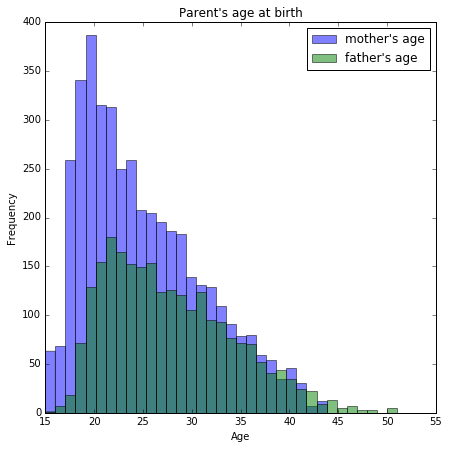

In [106]:
plot_two_histograms(mom_age, dad_age, label1="mother's age", label2="father's age", \
                    xlabel="Age", ylabel="Frequency", title = "Parent's age at birth")

## Exercise
Find a variable corresponding to household income and plot its histogram

In [98]:
# select variable
household_income = data_frame.m5j1

In [99]:
# remove NaN
household_income = remove_nan(household_income)
# Remove below zero
household_income = select_above_zero(household_income)

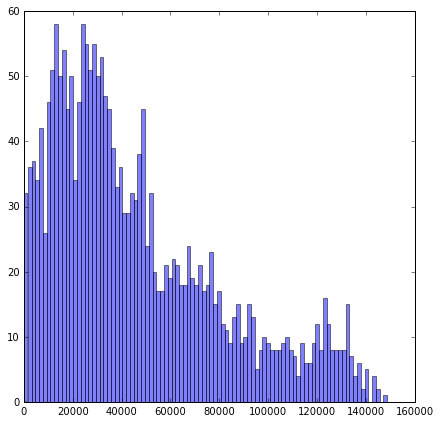

In [107]:
# plot
plot_one_histogram(household_income, label="")

# 2. Scatter Plots

In this section we will learn how to use scatter plots. Scatter plots are graphs in which the values of two variables are  plotted along two axes, the pattern of the resulting points revealing any correlation present.

We will use the household income in Year 1 and household income in Year 9 to compare spread and the changes in income across families in the study.

We will use the features f2l1 and m5j1 from the data.

#### Question: How do you expect a family's income to change across 8 years? Would you expect most families' income to grow, drop or stay the same?

#### Answer:

In [108]:
'''
This function takes in two arrays of equal length (xdata, ydata)
and plots them against each other in a scatterplot
'''
def scatterplot(xdata, ydata, xlabel="", ylabel="", title=""):
    fig = plt.figure(figsize=(7,7))
    data_max = income_yr1_9.max().max()
    plt.scatter(xdata, ydata)
    plt.plot([0,data_max],[0,data_max])
    plt.xlim(0,data_max)
    plt.ylim(0,data_max)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    fig.show()

In [102]:
# Let's find all the rows that are not NaN and positive for cm1age and cf1age.
income_yr1_9 = data_frame[["f2l1", "m5j1"]]

income_yr1_9 = remove_nan(income_yr1_9)
income_yr1_9 = select_above_zero(income_yr1_9)

income_yr1_9.head()

,f2l1,m5j1
challengeID,,
4,31037.239985,52330.093001
6,37215.440460,117744.847922
9,23437.652319,51248.022497
11,19508.401102,26853.171229
13,26212.061488,9679.511515


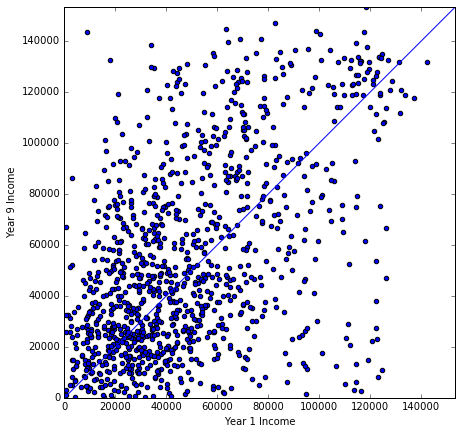

In [109]:
scatterplot(income_yr1_9.f2l1, income_yr1_9.m5j1, xlabel = "Year 1 Income", ylabel = "Year 9 Income")

The points on the blue diagonal line represent families whose income didn't change across the 8 years. We see that there were many families whose income dropped as well as many families whose income grew or stayed the same.

Now, let's look at scatterplot of incomes in Year 1 and Year 3. 

#### Question: How different do you expect this scatterplot to be?

#### Answer:

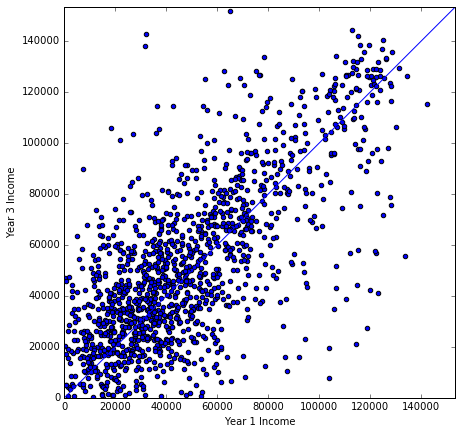

In [111]:
# Let's find all the rows that are not NaN and positive for cm1age and cf1age.
income_yr1_3 = data_frame[["f2l1", "f3l1"]]

income_yr1_3 = remove_nan(income_yr1_3)
income_yr1_3 = select_above_zero(income_yr1_3)

scatterplot(income_yr1_3.f2l1, income_yr1_3.f3l1, xlabel = "Year 1 Income", ylabel = "Year 3 Income")

#### Question: Is what you we consistent with the expectations?

#### Answer:

# 4. Box Plots

The box plot is a standardized way of displaying the distribution of data based on the five key properties: 
minimum, first quartile, median, third quartile, and maximum. The median (Q2) of the data appears as a red line inside a box, where the lower and upper limits of the box denote the first (Q1) and third quantile (Q3) of the data. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles. Data that falls outside of the whiskers (outliers) usually appear as data points in the box plot. 

We will use the boxplot function from pyplot which computes the inter-quartile range IQR = (Q3-Q1), sets the upper whisker to extend up to the last data point less than Q3 + 1.5 IQR and sets the lower whisker to extend up to the first data point greater than Q1 - 1.5 IQR. Beyond the whiskers, data are considered outliers and are plotted as individual points.

Below, we plot a box plot for the mother's age and one for the father's age (when the child was born). 

In [118]:
# Let's find all the rows that are not NaN and positive for cm1age and cf1age.
weekend_activity = data_frame["f5a3g"]

weekend_activity = remove_nan(weekend_activity)
weekend_activity = select_above_zero(weekend_activity)

weekend_activity.head()

challengeID
31     10
98     15
146    15
251    14
262    15
Name: f5a3g, dtype: int64

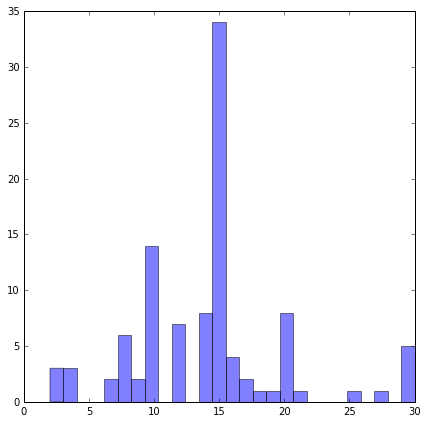

In [120]:
plot_one_histogram(weekend_activity, label="")

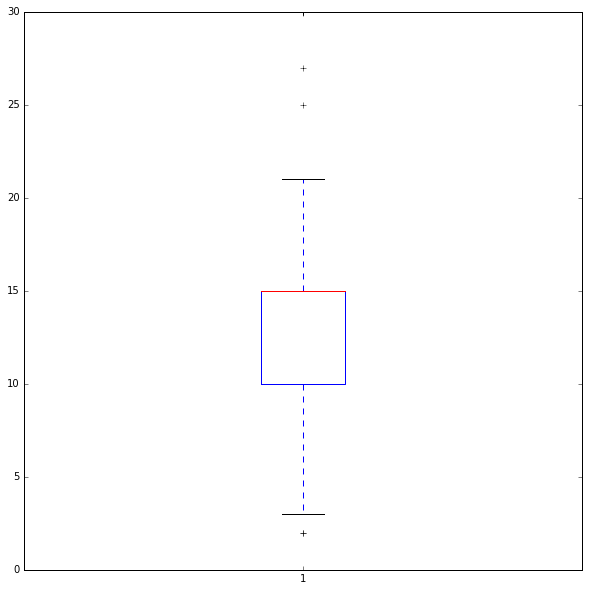

In [122]:
# The boxplot function in pyplot takes only one argument for the data. To plot two boxplots at once we combine the two 
# arrays into a list.

#data = [mom_age, dad_age]
# multiple box plots on one figure
fig = plt.figure(figsize=(10,10))
plt.boxplot([weekend_activity])
# Set y-axes to be between 10 and 60
#plt.ylim(10,60)
# Set x-ticks to display labels
labels = ('Mother')
#plt.xticks([1,2], labels)
plt.show()

## Visualizing Categorical (Discrete) Variables

### Pie Charts

You have probably seen and used pie charts before. They are great for visualizing proportions. Below we use a pie chart to
visualize the level of education of the parents when the child was born. 

These are categorical variables, meaning that the variable can take on one of a limited, and usually fixed number of possible values, assigning each entry in the data to a particular group.

We use the cm1edu and cf1edu features from the data which contain encoded information about the level of education of the parents when the child was born. The entries in cf1edu and cm1edu are either 1,2,3 or 4:

1: 'Less than High School',

2: 'High School or equivalent',

3: 'Some college or technical degree',

4: 'college or graduate degree'

In [ ]:
# Parents educational level at birth
mom_edu = data_frame.cm1edu[momdad_age_notnan]; # level of education of mother at birth
dad_edu = data_frame.cf1edu[momdad_age_notnan]; # level of education of father at birth
#  How many in each category? Use the len function to obtain the length of an array.
mom_edu_1 = len(mom_edu[mom_edu==1])
mom_edu_2 = len(mom_edu[mom_edu==2])
mom_edu_3 = len(mom_edu[mom_edu==3])
mom_edu_4 = len(mom_edu[mom_edu==4])

dad_edu_1 = len(dad_edu[dad_edu==1])
dad_edu_2 = len(dad_edu[dad_edu==2])
dad_edu_3 = len(dad_edu[dad_edu==3])
dad_edu_4 = len(dad_edu[dad_edu==4])

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'less HS','HS or equiv','Some coll or tech','coll or grad' 
mom_sizes = [mom_edu_1, mom_edu_2, mom_edu_3, mom_edu_4]
dad_sizes = [dad_edu_1, dad_edu_2, dad_edu_3, dad_edu_4]
# We can also pass an array called "explode" which determines how much we want to highlight one of the pie slices.
explode = (0, 0, 0, 0.1)  # only "explode" the 4th slice (i.e. 'College or Graduate Degree')
# Set the plot font size to 22
plt.rcParams.update({'font.size': 22})
# We will create a pie chart for the mother and one for the father, but we will place both pie charts on the same figure.
fig = plt.figure(figsize=(30,10))
# To do this, we make use of subplots. Subplots partition the figure into multiple plots. 
ax1 = plt.subplot(121) # 121 means we want 1 row, 2 columns, and that we want to plot on the first of these 2 subplots
plt.title('Mother''s Education')
ax1.pie(mom_sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2 = plt.subplot(122) # 122 means we want the 2nd plot of the 1 row, 2 columns figure.
plt.title('Father''s Education')
ax2.pie(dad_sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# 3. Bar Plots

Another great way to visualize categorical variables is to use bar plots. Below, we plot the level of education of the parents when the child was born on a bar plot together with whether they were married or not. To do this, we use the feature cf1marm, which is a binary variable representing whether the couple was married or not at the time the child was born.

In [ ]:
# Impute NaN entries in cf1marm
married = data_frame.cf1marm[momdad_age_notnan]
# How many moms are married in each of the 4 education level groups? 
# Here we make use of a for loop to check how many married and non married moms there are with each of the 4 levels of 
# education.

# First we initialize the mom_married_count and mom_not_married_count to empty lists
mom_married_count = []
mom_not_married_count = []
# For each education level:
for eduLevel in range(1,5):
    # Get array of married moms with current education level
    mom_married_with_eduLevel = married[mom_edu==eduLevel]
    # Count how many of them are married and how many are not married
    count_true =  len(mom_married_with_eduLevel[mom_married_with_eduLevel==1])
    count_false = len(mom_married_with_eduLevel[mom_married_with_eduLevel==0])
    # Update count arrays
    mom_married_count.append(count_true)
    mom_not_married_count.append(count_false)
    
# And we do the same for the father
dad_married_count = []
dad_not_married_count = []
# For each education level:
for eduLevel in range(1,5):
    # Get array of married moms with current education level
    dad_married_with_eduLevel = married[dad_edu==eduLevel]
    # Count how many of them are married and how many are not married
    count_true =  len(dad_married_with_eduLevel[dad_married_with_eduLevel==1])
    count_false = len(dad_married_with_eduLevel[dad_married_with_eduLevel==0])
    # Update count arrays
    dad_married_count.append(count_true)
    dad_not_married_count.append(count_false)

# We need to define the position of the bars. Since we have 4 levels of education, we will set the position of the
# bars to be at 1 2 3 and 4 on the x-axes. To make the two bars (one for married and one for not married) fit nicely,
# we set the width of the bars to 0.35
bar_pos = np.arange(4)
bar_width = 0.35
 
# create plot
fig = plt.figure(figsize=(30,10))
# subplot for mother
ax1 = plt.subplot(121)
rects1 = ax1.bar(bar_pos, mom_married_count, bar_width, color='b', label='Married') 
rects2 = ax1.bar(bar_pos + bar_width, mom_not_married_count, bar_width,color='g', label='Not Married') 
ax1.set_ylabel('Count')
plt.title('Mother''s Level of Education')
# set the level of education as the x-ticks
plt.xticks(bar_pos + bar_width, labels)
plt.legend()
plt.tight_layout()
# subplot for father
ax2 = plt.subplot(122)
rects1 = ax2.bar(bar_pos, dad_married_count, bar_width, color='b', label='Married') 
rects2 = ax2.bar(bar_pos + bar_width, dad_not_married_count, bar_width,color='g', label='Not Married') 
ax2.set_ylabel('Count')
plt.title('Father''s Level of Education')
# set the level of education as the x-ticks
plt.xticks(bar_pos + bar_width, labels)
plt.legend()
plt.tight_layout()

plt.show()

# Exercises

Below, there are two exercises that will help you get more experience programming in Python and using maplotlib to visualize data.

In [ ]:
# EXERCISE: make a scatter plot like the one above, but make the points corresponding to couples who are not married
# but living together (cohabiting) be green stars.

# Tip: Remember to remove the same rows that we removed NaNs from cm1age and cf1age for any new feature that you want to use.

In [ ]:
# EXERCISE: make the size of markers in the previous plot reflect for how many years the mother knew the father
# before getting pregnant.  
